In [44]:
from sklearn.ensemble import RandomForestClassifier
from utils.functions import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
columns = df.columns
print(df.head())
df = df.drop_duplicates()
df = df[df["quality"] != 9]
print(df["quality"].value_counts())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
index                                                                 
0                7.4              0.70         0.00             1.9   
1                7.8              0.88         0.00             2.6   
2                7.8              0.76         0.04             2.3   
3               11.2              0.28         0.56             1.9   
4                7.4              0.70         0.00             1.9   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
index                                                                        
0          0.076                 11.0                  34.0   0.9978  3.51   
1          0.098                 25.0                  67.0   0.9968  3.20   
2          0.092                 15.0                  54.0   0.9970  3.26   
3          0.075                 17.0                  60.0   0.9980  3.16   
4          0.076                 1

In [38]:
y = df["target"].values
X = df.drop(["quality","target"], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,
                                                           shuffle=True, random_state=42)

In [39]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [40]:
scaler = MinMaxScaler().fit(X_train)
X_train_smote = scaler.transform(X_train_smote)
X_test = scaler.transform(X_test)

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)

<Figure size 1008x1008 with 0 Axes>

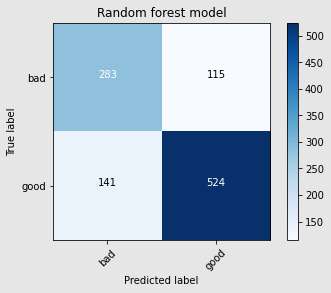

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       398
           1       0.82      0.79      0.80       665

    accuracy                           0.76      1063
   macro avg       0.74      0.75      0.75      1063
weighted avg       0.76      0.76      0.76      1063



In [45]:
cm = confusion_matrix(y_test, y_predict)
labels = ["bad","good"]
plot_confusion_matrix(cm=cm, classes=labels,
                      title= "Random forest model",
                      savefig_location="visuals/random_forest_2_categories")
print(classification_report(y_test, y_predict))

In [43]:
pickle.dump(model, open("models/random_forest_balanced_.sav", 'wb'))